In [2]:
import tensorflow as tf
import tensorflow_hub as hub
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.model_selection import train_test_split

In [3]:
directory = "PlantVillage"
labels = []
filenames = []

try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory)

    for plant_folder in root_dir:
        plant_disease_folder_list = listdir(f"{directory}/{plant_folder}")

        for image in plant_disease_folder_list:
            image_directory = f"{directory}/{plant_folder}/{image}"
            if (
                image_directory.endswith(".jpg") == True
                or image_directory.endswith(".JPG") == True
            ):
                filenames.append(image_directory)
                labels.append(plant_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

data = {"filename": filenames, "label": labels}
df = pd.DataFrame(data)
df.to_csv("labels.csv", index=False)

[INFO] Loading images ...
[INFO] Image loading completed


In [4]:
labels_csv = pd.read_csv("labels.csv")
print(labels_csv.describe())
labels_csv

                                                 filename  \
count                                               20636   
unique                                              20636   
top     PlantVillage/Tomato_Late_blight/44e96c62-48e6-...   
freq                                                    1   

                                        label  
count                                   20636  
unique                                     15  
top     Tomato__Tomato_YellowLeaf__Curl_Virus  
freq                                     3208  


,filename,label
0,PlantVillage/Tomato_Late_blight/44e96c62-48e6-...,Tomato_Late_blight
1,PlantVillage/Tomato_Late_blight/a03417ff-445e-...,Tomato_Late_blight
2,PlantVillage/Tomato_Late_blight/6965c48c-b329-...,Tomato_Late_blight
3,PlantVillage/Tomato_Late_blight/3b9a0c9e-353a-...,Tomato_Late_blight
4,PlantVillage/Tomato_Late_blight/147539f7-632d-...,Tomato_Late_blight
...,...,...
20631,PlantVillage/Tomato__Target_Spot/bb78af9f-9975...,Tomato__Target_Spot
20632,PlantVillage/Tomato__Target_Spot/babed586-ddef...,Tomato__Target_Spot
20633,PlantVillage/Tomato__Target_Spot/68bd8fa2-f798...,Tomato__Target_Spot
20634,PlantVillage/Tomato__Target_Spot/6882e052-a4d1...,Tomato__Target_Spot


<Axes: xlabel='label'>

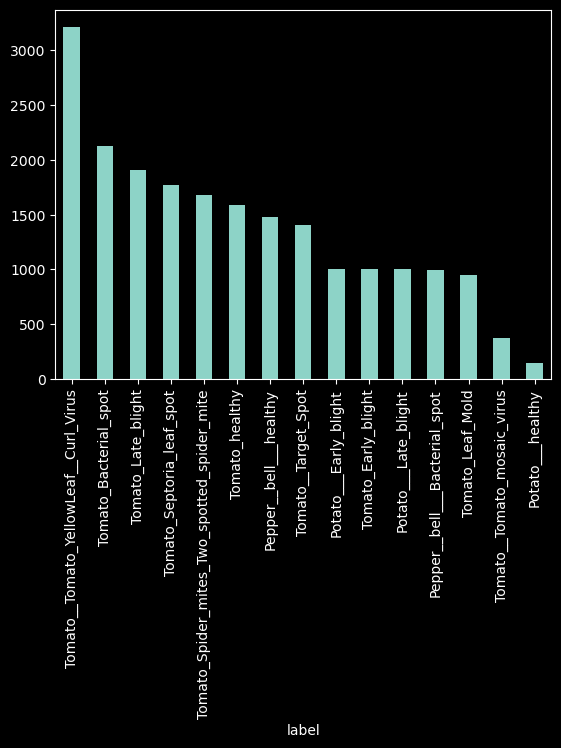

In [5]:
labels_csv["label"].value_counts().plot.bar()

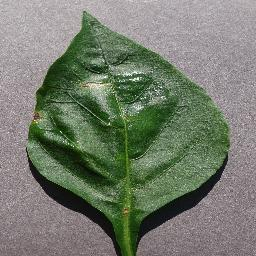

In [6]:
Image(
    "PlantVillage/Pepper__bell___Bacterial_spot/0a0dbf1f-1131-496f-b337-169ec6693e6f___NREC_B.Spot 9241.JPG"
)

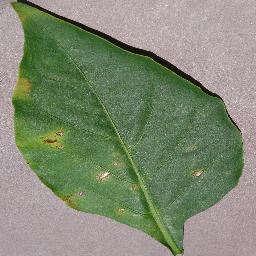

In [7]:
Image(filenames[0])

In [8]:
labels_csv["label"][0]

'Pepper__bell___Bacterial_spot'

## Transformando os labels em números

In [9]:
labels = labels_csv["label"].to_numpy()
labels

array(['Tomato_Late_blight', 'Tomato_Late_blight', 'Tomato_Late_blight',
       ..., 'Tomato__Target_Spot', 'Tomato__Target_Spot',
       'Tomato__Target_Spot'], dtype=object)

In [10]:
len(labels)

20636

In [11]:
# Verificando se os labels sao do mesmo tamanho com os filenames
if len(labels) == len(filenames):
    print("Tudo certo")
else:
    print("Algo deu errado")

Tudo certo


In [12]:
unique_labels = np.unique(labels)
unique_labels

array(['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
       'Tomato_Late_blight', 'Tomato_Leaf_Mold',
       'Tomato_Septoria_leaf_spot',
       'Tomato_Spider_mites_Two_spotted_spider_mite',
       'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
       'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'], dtype=object)

In [13]:
# A quantidade deve ser 15 pois esse é o número de classes de acordo o data baixado no kaggle
len(unique_labels)

15

In [71]:
# Vamos ver como fica ao fazer print de 1 dos labels em array de booleans
print(labels[0])
labels[0] == unique_labels

Tomato_Late_blight


array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False])

In [15]:
# Vamos converter todos os labels em array de booleans e ver somente os primeiros 2 como ficam
boolean_labels = [label == unique_labels for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False]),
 array([False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False])]

In [16]:
# A quantidade de labels ainda deve ser o mesmo
len(boolean_labels)

20636

In [70]:
# Visualizar como fica em valores numericos 0 e 1
print(labels[0])
print(boolean_labels[0].astype(int))

Tomato_Late_blight
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


## Criando o set de validação

In [18]:
X = filenames
y = boolean_labels

In [19]:
# Vamos começar com ~ 1k imagens e iremos aumentar posteriormente, assim podemos testar de forma mais rapida
NUM_IMAGES = 1000

In [20]:
X_train, X_val, y_train, y_val = train_test_split(
    X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42
)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [21]:
X_train[:2], y_train[:2]

(['PlantVillage/Tomato_Late_blight/40161a9a-7473-4496-9267-99a451276868___RS_Late.B 5021.JPG',
  'PlantVillage/Tomato_Late_blight/44673e7b-c880-4853-8816-065724e6c1ec___GHLB2 Leaf 8745.JPG'],
 [array([False, False, False, False, False, False, False,  True, False,
         False, False, False, False, False, False]),
  array([False, False, False, False, False, False, False,  True, False,
         False, False, False, False, False, False])])

## Pre-processando as imagens e tranformando elas em Tensors

In [66]:
# Convertendo imagens em numpy array
image = plt.imread(filenames[0])
image.shape

(256, 256, 3)

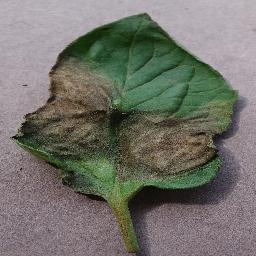

In [67]:
Image(filenames[0])

In [68]:
image

array([[[170, 163, 170],
        [174, 167, 174],
        [178, 171, 178],
        ...,
        [188, 182, 186],
        [189, 183, 187],
        [189, 183, 187]],

       [[177, 170, 177],
        [179, 172, 179],
        [180, 173, 180],
        ...,
        [186, 180, 184],
        [186, 180, 184],
        [186, 180, 184]],

       [[182, 175, 182],
        [181, 174, 181],
        [181, 174, 181],
        ...,
        [184, 178, 182],
        [183, 177, 181],
        [183, 177, 181]],

       ...,

       [[162, 150, 154],
        [134, 122, 126],
        [138, 126, 130],
        ...,
        [131, 116, 123],
        [148, 133, 140],
        [121, 106, 113]],

       [[135, 123, 127],
        [117, 105, 109],
        [121, 109, 113],
        ...,
        [148, 133, 140],
        [126, 111, 118],
        [144, 129, 136]],

       [[136, 124, 128],
        [135, 123, 127],
        [141, 129, 133],
        ...,
        [141, 126, 133],
        [105,  90,  97],
        [130, 115, 122]]

In [69]:
# Transformando em um tensor
tf.constant(image)

<tf.Tensor: shape=(256, 256, 3), dtype=uint8, numpy=
array([[[170, 163, 170],
        [174, 167, 174],
        [178, 171, 178],
        ...,
        [188, 182, 186],
        [189, 183, 187],
        [189, 183, 187]],

       [[177, 170, 177],
        [179, 172, 179],
        [180, 173, 180],
        ...,
        [186, 180, 184],
        [186, 180, 184],
        [186, 180, 184]],

       [[182, 175, 182],
        [181, 174, 181],
        [181, 174, 181],
        ...,
        [184, 178, 182],
        [183, 177, 181],
        [183, 177, 181]],

       ...,

       [[162, 150, 154],
        [134, 122, 126],
        [138, 126, 130],
        ...,
        [131, 116, 123],
        [148, 133, 140],
        [121, 106, 113]],

       [[135, 123, 127],
        [117, 105, 109],
        [121, 109, 113],
        ...,
        [148, 133, 140],
        [126, 111, 118],
        [144, 129, 136]],

       [[136, 124, 128],
        [135, 123, 127],
        [141, 129, 133],
        ...,
        [141, 126, 13

In [26]:
IMG_SIZE = 224


def process_image(image_path, image_size=IMG_SIZE):
    """Recebe o path de uma imagem, transforma ele em um tensor e retorna a imagem

    Args:
        image_path (String): Recebe o path da imagem
        image_size (int, optional): Recebe o tamanho da imagem. Default IMG_SIZE.
    """
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[image_size, image_size])
    return image

## Transformando o data em batches

In [27]:
def get_image_label(image_path, label):
    """
    Esta função recebe o path da imagem e sua respectiva label, processa a imagem e retorna um tuple de (image, label).

    Parâmetros:
    - image_path (String): O path da imagem.
    - label (Array de Booleanos): A label correspondente à imagem.

    Retorna:
    - Tuple: Um tuple contendo a imagem processada (Tensor) e sua label.

    A função utiliza a função process_image para converter o arquivo de imagem em um Tensor, redimensioná-lo para o tamanho especificado (padrão é 224x224) e converter seus valores de pixel para float32.
    """
    image = process_image(image_path)
    return image, label

In [28]:
# Testando as funções acima
get_image_label(X[0], tf.constant(y[0]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.6280112 , 0.5812325 , 0.66556627],
         [0.6009204 , 0.554982  , 0.62731093],
         [0.55684274, 0.51538616, 0.56104445],
         ...,
         [0.75062037, 0.70748305, 0.6996399 ],
         [0.7138252 , 0.670688  , 0.66284484],
         [0.6422157 , 0.5990785 , 0.59123534]],
 
        [[0.5716887 , 0.5293918 , 0.5906763 ],
         [0.60166067, 0.56020415, 0.6130452 ],
         [0.61884755, 0.58157265, 0.61186475],
         ...,
         [0.70774317, 0.6646059 , 0.6567628 ],
         [0.7158464 , 0.67270917, 0.66486603],
         [0.71296513, 0.6698279 , 0.66198474]],
 
        [[0.61870754, 0.5808924 , 0.61226493],
         [0.6369148 , 0.59994   , 0.6209684 ],
         [0.6330733 , 0.5996799 , 0.6038816 ],
         ...,
         [0.7173672 , 0.6742299 , 0.6663868 ],
         [0.7168867 , 0.67374945, 0.6659063 ],
         [0.68909514, 0.6459579 , 0.63811475]],
 
        ...,
 
        [[0.6684477 , 0.62138885

In [29]:
BATCH_SIZE = 32


def create_data_batches(
    X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False
):
    """
    Cria batches com images (x) e labels (y).
    Baralha o data se for data de treinamento caso contrario nao, se for data de validacao.
    Tambem aceita data de teste como um input (sem os labels)
    """

    if test_data:
        print("Criando data batch de teste...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch

    elif valid_data:
        print("Criando data batch de validação...")
        data = tf.data.Dataset.from_tensor_slices(
            (tf.constant(X), tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        print("Criando data batch de treinamento...")
        data = tf.data.Dataset.from_tensor_slices(
            (tf.constant(X), tf.constant(y)))
        data = data.shuffle(buffer_size=len(X))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

In [30]:
# Criando data batch para treinamento e validacao
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)
train_data.element_spec, val_data.element_spec

Criando data batch de treinamento...
Criando data batch de validação...


((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 15), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 15), dtype=tf.bool, name=None)))

## Visualizando o nosso data batch

In [31]:
def plot_25_images(images, labels):
    """
    Mostrar 25 imagens e seus labels do data batch
    """
    plt.figure(figsize=(12, 10))
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(unique_labels[labels[i].argmax()])
        plt.axis("off")

In [32]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.bool, name=None))>

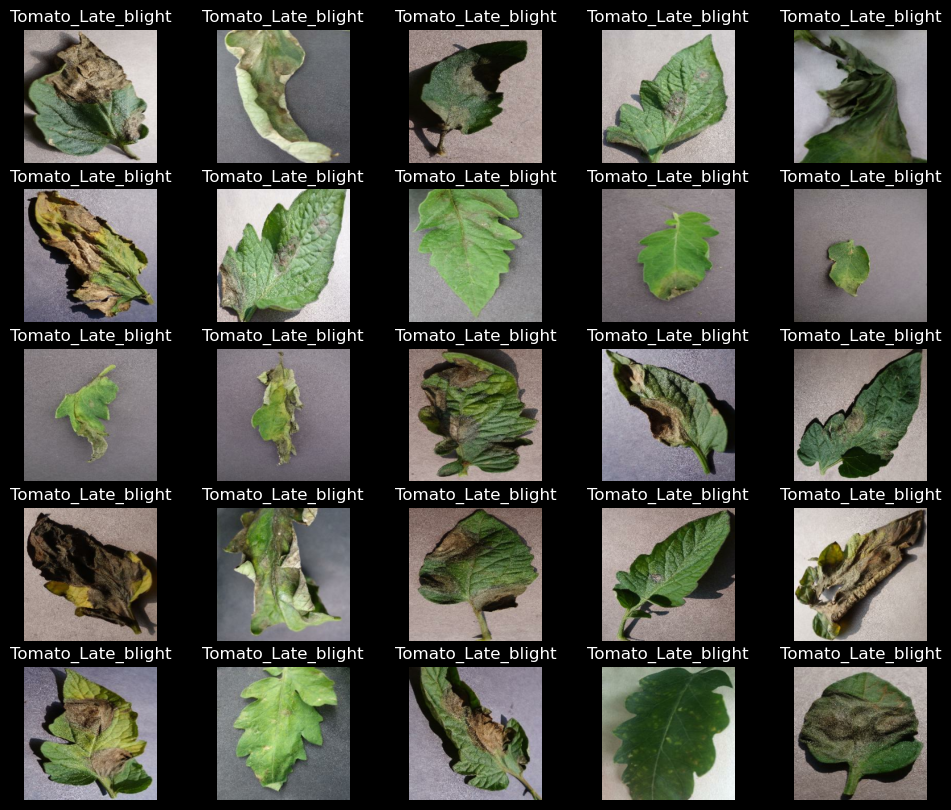

In [33]:
# Como vem na celula acima o nosso data ja esta em batch entao temos que desfazer para poder visualizar no plot
train_images, train_labels = next(train_data.as_numpy_iterator())
plot_25_images(train_images, train_labels)

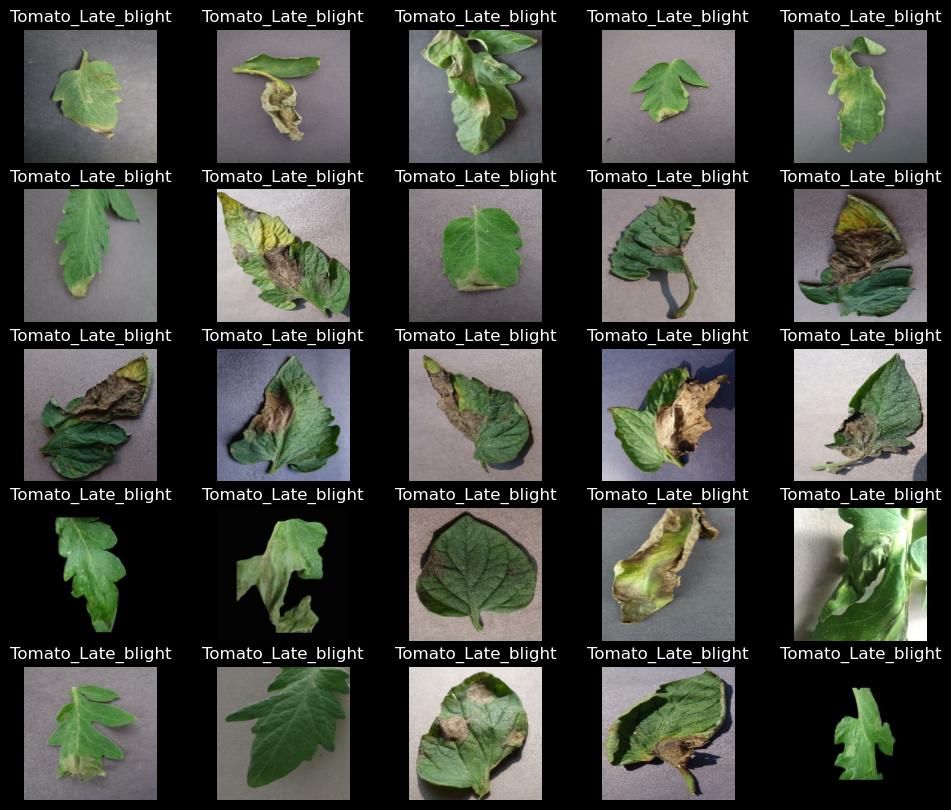

In [34]:
# Fazemos o mesmo com data de validacao
val_images, val_labels = next(val_data.as_numpy_iterator())
plot_25_images(val_images, val_labels)

## Contruindo o nosso modelo

In [35]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SHAPE = len(unique_labels)
# vamos usar o modelo mobilenet
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2"

In [40]:
# Criando a funcao que faz o build do modelo keras
hub_layer = hub.KerasLayer(MODEL_URL)
keras_layer = tf.keras.layers.Lambda(lambda x: hub_layer(x))


def create_model(
    input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL
):
    print("Criando modelo...", model_url)
    model = tf.keras.Sequential(
        [
            keras_layer,
            tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax"),
        ]
    )
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"],
    )
    model.build(INPUT_SHAPE)
    return model

In [41]:
model = create_model()
model.summary()

Criando modelo... https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │        15,030 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,030 (58.71 KB)

 Trainable params: 15,030 (58.71 KB)

 Non-trainable params: 0 (0.00 B)

## Tensorboard callback

Tensorboard ajuda a monitorar o progresso do nosso modelo durante e depois do treinamento de forma visual

In [43]:
%load_ext tensorboard

In [52]:
import datetime
import os

In [56]:
# Criando uma funcao para o tensorboard
def create_tensorboard_callback():
    logdir = os.path.join(
        "data/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    )
    print(f"Directorio de logs do TensorBoard: {logdir}")
    return tf.keras.callbacks.TensorBoard(logdir)

## Early stopping callback

Early stopping callback ajuda a prevenir overfitting ao parar o modelo quando as metricas nao estao mais a melhorar

In [46]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=3)

## Treinando o modelo usando uma parte do dataset

In [47]:
NUM_EPOCHS = 100

In [48]:
# Criar uma funcao para treinar e retornar o modelo treinado
def train_model():
    """
    Treina o modelo e retorna a versao treinada
    """

    model = create_model()
    tensorboard = create_tensorboard_callback()
    model.fit(
        x=train_data,
        epochs=NUM_EPOCHS,
        validation_data=val_data,
        validation_freq=1,
        callbacks=[tensorboard, early_stopping],
    )
    return model

In [57]:
model = train_model()

Criando modelo... https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2
TensorBoard log directory: data/logs/20240517-174802
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.6006 - loss: 1.7441 - val_accuracy: 1.0000 - val_loss: 8.2504e-05
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 1.0000 - loss: 5.9087e-05 - val_accuracy: 1.0000 - val_loss: 2.2488e-05
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 133s 5s/step - accuracy: 1.0000 - loss: 2.7442e-05 - val_accuracy: 1.0000 - val_loss: 1.9919e-05
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 124s 5s/step - accuracy: 1.0000 - loss: 2.2487e-05 - val_accuracy: 1.0000 - val_loss: 1.9660e-05


In [59]:
%tensorboard --logdir data/logs

Reusing TensorBoard on port 6008 (pid 28319), started 0:01:23 ago. (Use '!kill 28319' to kill it.)

## Prever usando o modelo treinado

In [60]:
# Prever usando o data de validação (nao usado durante o treinamento)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step


array([[2.76236648e-07, 5.78620494e-08, 2.36713007e-07, ...,
        3.70411954e-07, 3.15793795e-06, 7.52296430e-08],
       [4.23644586e-09, 2.80943357e-09, 1.18998669e-08, ...,
        1.30368516e-09, 5.11240295e-08, 5.07360987e-10],
       [1.29301618e-08, 2.23962160e-09, 6.56820731e-08, ...,
        9.18316161e-08, 2.08691972e-07, 1.76789321e-08],
       ...,
       [2.98492009e-09, 7.79110554e-09, 1.51946562e-08, ...,
        1.46618895e-08, 1.45225698e-07, 7.39737871e-09],
       [6.73691936e-10, 9.02845076e-10, 5.91919891e-09, ...,
        7.66088526e-10, 6.53096954e-09, 3.88257204e-09],
       [5.93817973e-09, 6.20926377e-09, 3.35118813e-08, ...,
        3.08978052e-08, 1.45722339e-07, 2.90268942e-09]], dtype=float32)

In [61]:
predictions.shape

(200, 15)

In [65]:
# Vendo o que preveu para a 1ª imagem
print(f"Previsao da primeira imagem: {
      unique_labels[np.argmax(predictions[0])]}")

Previsao da primeira imagem: Tomato_Late_blight


In [72]:
# Criar uma funcao que retorna esses labels para ficar mais facil
def get_pred_label(prediction_probabilities):
    """
    Retorna o label de acordo com a probabilidade de cada classe
    """
    return unique_labels[np.argmax(prediction_probabilities)]

In [73]:
# Testando a funcao acima
pred_label = get_pred_label(predictions[0])
pred_label

'Tomato_Late_blight'

O modelo não foi treinado nos dados de validação, durante a função `fit()`, ele apenas usou os dados de validação para avaliar a si mesmo. Portanto, podemos usar as imagens de validação para comparar visualmente as previsões do nosso modelo com as labels de validação.

Como nossos dados de validação (val_data) estão em formato de batch, para obter uma lista de imagens de validação e labels, precisamos desfazer o batch (usando a função `unbatch()`) e então transformá-lo em um iterador usando a função `as_numpy_iterator()`.

Vamos criar uma função que faz isso.

In [74]:
# Criando uma funcao para fazer unbacth do batch dataset
def unbatchify(data):
    images = []
    labels = []
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_labels[np.argmax(label)])
    return images, labels

In [75]:
val_images, val_data = unbatchify(val_data)
val_images[0], val_data[0]

2024-05-17 18:28:00.110919: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(array([[[0.2772109 , 0.29289716, 0.30466187],
         [0.30626252, 0.3219488 , 0.3337135 ],
         [0.2880352 , 0.3037215 , 0.3154862 ],
         ...,
         [0.46844754, 0.4606044 , 0.4723691 ],
         [0.46330526, 0.45546213, 0.46722683],
         [0.4358139 , 0.42797077, 0.43973547]],
 
        [[0.32605043, 0.3417367 , 0.3535014 ],
         [0.33585435, 0.35154063, 0.36330533],
         [0.30704284, 0.3227291 , 0.33449382],
         ...,
         [0.44569838, 0.43785524, 0.44961995],
         [0.43931568, 0.43147254, 0.44323725],
         [0.41954753, 0.4117044 , 0.4234691 ]],
 
        [[0.3077631 , 0.32344937, 0.33521408],
         [0.32166868, 0.33735496, 0.34911966],
         [0.30356145, 0.31924772, 0.33101243],
         ...,
         [0.45708287, 0.44923973, 0.46100444],
         [0.45042014, 0.442577  , 0.4543417 ],
         [0.43677452, 0.4289314 , 0.4406961 ]],
 
        ...,
 
        [[0.15594245, 0.17162873, 0.1755503 ],
         [0.18267305, 0.19835934, 0.20228

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    Ver a previsao, os labels e imagens de validacao num plot
    """
    
    